In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import json
from pathlib import Path

In [3]:
data_dir = Path('../../data')

In [4]:
B_df = pd.read_csv(data_dir / 'plierResult/B.csv', index_col=0)
B_df.shape

(258, 4293)

In [5]:
B_df

,SRX890545,SRX1067711,SRX1067710,SRX762971,SRX762970,SRX762973,SRX762972,SRX762975,SRX762974,SRX762977,...,SRX3399303,SRX3399304,SRX3399305,SRX3399306,SRX3399307,SRX3399308,SRX3399309,SRX3399310,SRX3399311,SRX3399312
"1,REACTOME_TRNA_AMINOACYLATION",-0.047142,-0.138811,0.151608,-0.430337,-0.631706,-0.592255,-0.498313,-0.447562,-0.668885,-0.580515,...,0.538648,-1.390971,-0.518239,0.307688,0.223837,0.294573,0.291303,0.355084,0.259266,0.287875
"2,KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION",-0.061672,-0.072859,0.037346,0.065104,0.032056,-0.022567,0.029503,0.032328,0.020428,0.033609,...,0.032184,-0.015001,0.097762,-0.022403,-0.026442,-0.069644,-0.023101,-0.005761,-0.008042,-0.049875
"3,REACTOME_SIGNALING_BY_GPCR",-0.130283,-0.141798,-0.192227,0.101707,0.143076,0.085711,-0.019661,0.005047,-0.069116,0.062790,...,-0.226379,-0.153295,-0.056739,-0.197687,-0.166893,-0.141022,-0.168163,-0.149219,-0.194899,-0.233378
"4,REACTOME_INNATE_IMMUNE_SYSTEM",1.146374,0.340086,0.235739,0.161693,0.110677,0.299270,0.203254,0.163833,0.198905,0.154196,...,0.791465,0.431439,-0.110468,0.612604,0.591446,0.539468,0.677087,0.570555,0.645999,0.508587
"5,KEGG_HEMATOPOIETIC_CELL_LINEAGE",-0.898703,-0.645768,-0.367522,0.174591,0.055156,0.066972,0.124781,0.172566,0.030923,0.061621,...,-0.772315,-0.378045,-0.358191,0.221228,0.197928,0.244524,0.069541,0.218329,0.222681,0.280000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"254,REACTOME_METABOLISM_OF_LIPIDS_AND_LIPOPROTEINS",-0.084233,-0.079477,-0.034273,0.000284,0.006361,-0.045630,-0.036355,0.005187,-0.045680,-0.042046,...,0.007572,0.027949,0.009592,-0.033612,-0.005468,-0.019632,-0.012548,-0.007463,-0.005259,-0.051688
LV 255,-0.079715,-0.020449,0.009063,0.054229,0.087683,0.076221,-0.037388,0.017713,-0.029546,0.025096,...,-0.036432,-0.084407,-0.126419,-0.032212,-0.045322,-0.060539,-0.064325,-0.021569,0.013963,-0.054706
"256,KEGG_NEUROACTIVE_LIGAND_RECEPTOR_INTERACTION",0.031648,-0.055535,-0.045567,0.099433,0.114241,0.123324,0.033620,0.081369,0.038409,0.094077,...,-0.035852,-0.045484,-0.070116,-0.013416,-0.060667,0.006640,-0.037800,-0.039271,-0.057372,-0.063778
LV 257,0.097951,-0.110908,-0.116538,-0.046031,-0.135770,-0.099439,-0.056716,-0.027337,-0.107376,-0.067760,...,-0.043986,-0.107273,-0.105113,0.050640,0.018015,0.063724,0.047077,0.045941,-0.042020,-0.020573


### UMAP plot of samples according to their B matrix

In [6]:
with open(data_dir / 'CellO_data/bulk_RNA_seq_training_set/bulk_labels.json', 'r') as f:
    labels_data = json.load(f)
    
sample_to_cell_types = labels_data #labels_data['labels']

In [7]:
import sys
sys.path.append('../../onto_lib')

In [8]:
import general_ontology_tools as got

Unable to import pygraphviz. Visualization is disabled.
Loading ontology from ../../onto_lib\obo\DOID.17-01-30.obo ...
Loading ontology from ../../onto_lib\obo\UBERON.17-01-30.obo ...
Loading ontology from ../../onto_lib\obo\CL.18-11-13.obo ...
Loading ontology from ../../onto_lib\obo\CVCL.17-01-30.obo ...
Loading ontology from ../../onto_lib\obo\EFO.17-01-30.obo ...


In [9]:
from anndata import AnnData
import scanpy as sc

In [10]:
# Gather all of the cell types
all_cell_types = set()
for cts in sample_to_cell_types.values():
    all_cell_types.update([got.get_term_name(x) for x in cts])

In [49]:
ad_src = AnnData(B_df.transpose())
ad_src.obs.index

Index(['SRX890545', 'SRX1067711', 'SRX1067710', 'SRX762971', 'SRX762970',
       'SRX762973', 'SRX762972', 'SRX762975', 'SRX762974', 'SRX762977',
       ...
       'SRX3399303', 'SRX3399304', 'SRX3399305', 'SRX3399306', 'SRX3399307',
       'SRX3399308', 'SRX3399309', 'SRX3399310', 'SRX3399311', 'SRX3399312'],
      dtype='object', length=4293)

In [47]:
ad_src

AnnData object with n_obs × n_vars = 4293 × 258
    obs: 'SRX1067711'

In [53]:
cts_per_samples = [
    set(map(got.get_term_name, sample_to_cell_types[sample]))
    for sample in ad.obs.index
]

In [70]:
# Add cell type annotations to AnnData object
ad = AnnData(B_df.transpose())
for ct in all_cell_types:
    is_cell_type = [
        str(bool(ct in cts_in_sample)) for cts_in_sample in cts_per_samples
    ]
    ad.obs[ct] = is_cell_type

In [75]:
# Compute UMAP
sc.pp.pca(ad)
sc.pp.neighbors(ad)
sc.tl.umap(ad)

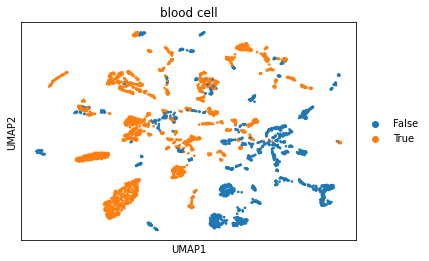

In [73]:
sc.pl.umap(ad, color='blood cell')

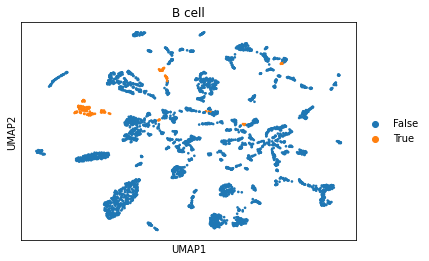

In [74]:
sc.pl.umap(ad, color='B cell')